### Use case 1:
This dataset contains information of different wines composition and the preference of
the customer segment. Apply Linear discriminant Techniques and build a model; and
validate too.

In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
path = os.getcwd()

In [4]:
itrain = pd.read_excel(str(path)+'/Wine_dataset.xlsx')

In [5]:
itrain.apply(lambda x:(len(x.unique()), [x.unique()]))

Alcohol                 (126, [[14.23, 13.2, 13.16, 14.37, 13.24, 14.2...
Malic_Acid              (133, [[1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1....
Ash                     (79, [[2.43, 2.14, 2.67, 2.5, 2.87, 2.45, 2.61...
Ash_Alcanity            (63, [[15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14....
Magnesium               (53, [[127.0, 100.0, 101.0, 113.0, 118.0, 112....
Total_Phenols           (97, [[2.8, 2.65, 3.85, 3.27, 2.5, 2.6, 2.98, ...
Flavanoids              (132, [[3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2....
Nonflavanoid_Phenols    (39, [[0.28, 0.26, 0.3, 0.24, 0.39, 0.34, 0.31...
Proanthocyanins         (101, [[2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1....
Color_Intensity         (132, [[5.64, 4.38, 5.68, 7.8, 4.32, 6.75, 5.2...
Hue                     (78, [[1.04, 1.05, 1.03, 0.86, 1.02, 1.06, 1.0...
OD280                   (122, [[3.92, 3.4, 3.17, 3.45, 2.93, 2.85, 3.5...
Proline                 (121, [[1065.0, 1050.0, 1185.0, 1480.0, 735.0,...
Customer_Segment                      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7eb3435f8>,
      dtype=object)

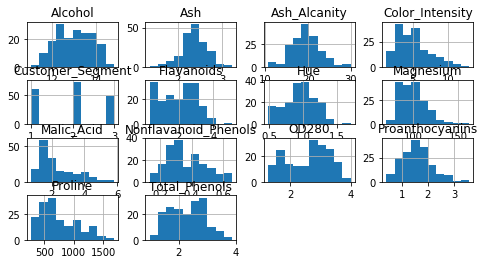

In [6]:
# Distrubution of variables is normal
itrain.hist(figsize = (8,4))

In [7]:
X = itrain.drop('Customer_Segment', axis = 1)
y = itrain['Customer_Segment']

In [8]:
# np.set_printoptions(precision = 2)
 
# mean_vectors = []
# for cl in range(1,4):
#     mean_vectors.append(np.mean(X[y==1].values, axis=0))
#     print('Mean Vectors for class %s:\n%s\n' %(cl, mean_vectors[cl-1]))

Text(0.5,1,'LDA of Wine data')

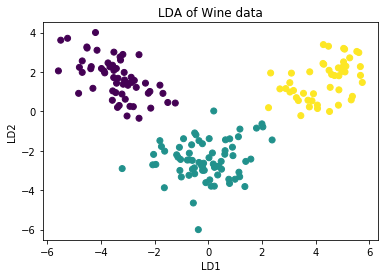

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components = 2)
lda = sklearn_lda.fit_transform(X, y)
lda_df = pd.DataFrame(data = lda, columns = ['LD1', 'LD2'])


plt.scatter(x = 'LD1', y = 'LD2', data = lda_df, c = y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Wine data')

Text(0.5,1,'PCA of wine data - 2 principle components')

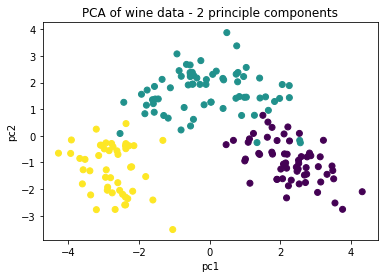

In [10]:
### Standarization:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
Xstd = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(Xstd)
pdf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

plt.scatter(x = 'pc1', y = 'pc2', data = pdf, c = y)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA of wine data - 2 principle components')

Text(0.5,1,'LDA of Wine data (Std)')

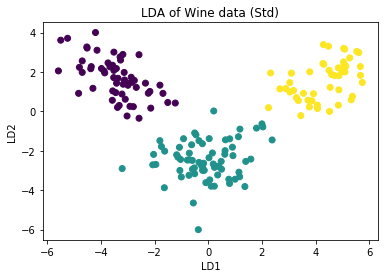

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
# sklearn_lda = LDA(solver='eigen', shrinkage='auto')
sklearn_lda = LDA(n_components = 2)
lda = sklearn_lda.fit_transform(Xstd, y)
lda_df = pd.DataFrame(data = lda, columns = ['LD1', 'LD2'])



plt.scatter(x = 'LD1', y = 'LD2', data = lda_df, c = y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Wine data (Std)')

In [12]:
# test Train splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xstd,y,test_size = 0.2,random_state = 124)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=4)
X_train1 = lda.fit_transform(X_train,y_train)
X_test1 = lda.transform(X_test)

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train1,y_train) # fitting the training data

lrpred = lr.predict(X_test1)    #predicting on test data

print('Accuracy of logistic on test set: {:.2f}'.format(lr.score(X_test1, y_test)))
print(classification_report(y_test, lrpred))

Accuracy of logistic on test set: 1.00
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00        18
          3       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        36



In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# LDA
lda_model = LDA()
lda_pred = lda_model.fit(X_train1, y_train).predict(X_test1)

print('Accuracy of lda on test set: {:.2f}'.format(lr.score(X_test1, y_test)))
print(classification_report(y_test, lda_pred))


# QDA
qda = QDA(store_covariance =True)
qda_pred = qda.fit(X_train1, y_train).predict(X_test1)

print('Accuracy of qda on test set: {:.2f}'.format(lr.score(X_test1, y_test)))
print(classification_report(y_test, qda_pred))

cov = qda.covariance_
mns = qda.means_

Accuracy of lda on test set: 1.00
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00        18
          3       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        36

Accuracy of qda on test set: 1.00
             precision    recall  f1-score   support

          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00        18
          3       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        36

